# Pre-Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
all_df = pd.read_csv("spotify-2023.csv", encoding="latin-1")
all_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Explore the Data and do some pre-processing

In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
#look for NaN values
all_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [5]:
#drop NaN values
key_dropped = all_df.dropna(subset=['key'])
key_dropped.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        41
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
#Assume that the NaN values mean that the song is not in shazam charts
clean_df = key_dropped.copy()
clean_df['in_shazam_charts'] = pd.DataFrame(key_dropped['in_shazam_charts'].fillna(0))
clean_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

## Create Seperate Features for Artists

In [7]:
#seperate the artist names using str.split()
artist_df = clean_df["artist(s)_name"].str.split(',', expand=True)

#Add new columns for first, second and third artists
clean_df["artist_1"] = artist_df[0]
clean_df["artist_2"] = artist_df[1]
clean_df["artist_3"] = artist_df[2]

#removing artist(s)_name column
clean_df = clean_df.drop("artist(s)_name", axis=1)

#move newly created columns to the front
clean_df.insert(1, 'artist_1', clean_df.pop('artist_1'))
clean_df.insert(2, 'artist_2', clean_df.pop('artist_2'))
clean_df.insert(3, 'artist_3', clean_df.pop('artist_3'))
clean_df


,track_name,artist_1,artist_2,artist_3,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,None,2,2023,7,14,553,147,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,None,None,1,2023,3,23,1474,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,None,None,1,2023,6,30,1397,113,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,None,None,1,2019,8,23,7858,100,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,None,None,1,2023,5,18,3133,50,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,None,None,1,2022,11,3,953,0,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,None,None,1,2022,10,21,1180,0,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),Feid,Paulo Londra,None,2,2022,11,3,573,0,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,Feid,Sech,Jhayco,3,2022,10,20,1320,0,...,97,C#,Major,82,67,77,8,0,12,5


In [8]:
clean_df.isnull().sum()

track_name                0
artist_1                  0
artist_2                527
artist_3                758
artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts         0
streams                   0
in_apple_playlists        0
in_apple_charts           0
in_deezer_playlists       0
in_deezer_charts          0
in_shazam_charts          0
bpm                       0
key                       0
mode                      0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%            0
instrumentalness_%        0
liveness_%                0
speechiness_%             0
dtype: int64

Splitting the artist column results in more NaN values that have to be cleaned. Just replace the Nan with 'empty'

In [9]:
#replace all the NaN values in artist_1 and artist_2 with "empty"
cleaner_df = clean_df.copy()
cleaner_df['artist_2'] = pd.DataFrame(clean_df['artist_2'].fillna("empty"))

even_cleaner_df = cleaner_df.copy()
even_cleaner_df['artist_3'] = pd.DataFrame(cleaner_df['artist_3'].fillna("empty")) 
even_cleaner_df.isnull().sum()

track_name              0
artist_1                0
artist_2                0
artist_3                0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

### Feature selection

In [10]:
dropped_df = even_cleaner_df.drop(['released_year', 'released_month', 'released_day', 'track_name', 'in_spotify_playlists',
                   'in_apple_playlists', 'in_deezer_playlists'
                  ], axis = 1)
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 952
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   artist_1            858 non-null    object
 1   artist_2            858 non-null    object
 2   artist_3            858 non-null    object
 3   artist_count        858 non-null    int64 
 4   in_spotify_charts   858 non-null    int64 
 5   streams             858 non-null    object
 6   in_apple_charts     858 non-null    int64 
 7   in_deezer_charts    858 non-null    int64 
 8   in_shazam_charts    858 non-null    object
 9   bpm                 858 non-null    int64 
 10  key                 858 non-null    object
 11  mode                858 non-null    object
 12  danceability_%      858 non-null    int64 
 13  valence_%           858 non-null    int64 
 14  energy_%            858 non-null    int64 
 15  acousticness_%      858 non-null    int64 
 16  instrumentalness_%  858 non-nul

In [11]:
# Fixing Data type for streams and in_shazam_charts
dropped_df['streams'] = pd.to_numeric(dropped_df['streams'], errors='coerce')
dropped_df.isna().sum()

artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               1
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [12]:
#one row was corrupted so we delete it
all_df.iloc[574]
df = dropped_df.dropna(subset=['streams'])
df.isnull().sum()

artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               0
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_1            857 non-null    object 
 1   artist_2            857 non-null    object 
 2   artist_3            857 non-null    object 
 3   artist_count        857 non-null    int64  
 4   in_spotify_charts   857 non-null    int64  
 5   streams             857 non-null    float64
 6   in_apple_charts     857 non-null    int64  
 7   in_deezer_charts    857 non-null    int64  
 8   in_shazam_charts    857 non-null    object 
 9   bpm                 857 non-null    int64  
 10  key                 857 non-null    object 
 11  mode                857 non-null    object 
 12  danceability_%      857 non-null    int64  
 13  valence_%           857 non-null    int64  
 14  energy_%            857 non-null    int64  
 15  acousticness_%      857 non-null    int64  
 16  instrumentaln

For in_shazam_charts, the numbers have commas which cause them to be recognised as strings. Remove the commas.

In [14]:
#remove commas
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df.isnull().sum()

#Again, some of the in_shazam_charts data is empty. Again, we assume that these songs do not appear in the charts.
df['in_shazam_charts'] = pd.DataFrame(df['in_shazam_charts'].fillna(0)) 
df.isnull().sum()

df = df.reset_index(drop=True)
df

/tmp/ipykernel_8719/3991567186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
/tmp/ipykernel_8719/3991567186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
/tmp/ipykernel_8719/3991567186.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,artist_1,artist_2,artist_3,artist_count,in_spotify_charts,streams,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Latto,Jung Kook,empty,2,147,141381703.0,263,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,Myke Towers,empty,empty,1,48,133716286.0,126,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,Olivia Rodrigo,empty,empty,1,113,140003974.0,207,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Taylor Swift,empty,empty,1,100,800840817.0,207,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,Bad Bunny,empty,empty,1,50,303236322.0,133,15,425.0,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,Selena Gomez,empty,empty,1,0,91473363.0,13,1,0.0,144,A,Major,60,24,39,57,0,8,3
853,Taylor Swift,empty,empty,1,0,121871870.0,0,0,0.0,166,F#,Major,42,7,24,83,1,12,6
854,Feid,Paulo Londra,empty,2,0,73513683.0,0,0,0.0,92,C#,Major,80,81,67,4,0,8,6
855,Feid,Sech,Jhayco,3,0,133895612.0,26,0,0.0,97,C#,Major,82,67,77,8,0,12,5


### Creating new feature for whether songs appear in apple, spotify and shazam top 100 charts

In [15]:
df['spotify_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_spotify_charts']))
df['deezer_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_deezer_charts']))
df['apple_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_apple_charts']))
df['shazam_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_shazam_charts']))
df
#remove 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'
df = df.drop(['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'], axis=1)

### One-Hot Encoding Categorical Variables


In [16]:
#import one-hot encoder and initialise it
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

#extract the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

#perform the one-hot encoding
ohe = encoder.fit_transform(df[['artist_1', 'artist_2', 'artist_3', 'key', 'mode']])
encoded_df = pd.DataFrame(ohe, columns = encoder.get_feature_names_out(['artist_1', 'artist_2', 'artist_3', 'key', 'mode']))

encoded_df

,artist_1_(G)I-DLE,artist_1_21 Savage,artist_1_24kgoldn,artist_1_50 Cent,artist_1_A$AP Rocky,artist_1_Abhijay Sharma,artist_1_Adele,artist_1_Aerosmith,artist_1_Agust D,artist_1_Aitana,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
#join the encoded variables dataframe with our main dataframe
combined_df = pd.concat([df, encoded_df], axis=1)

#check for NaN values
combined_df.isnull().values.any()

False

In [18]:
#drop artist, key and mode columns
combined_df = combined_df.drop(['artist_1', 'artist_2', 'artist_3', 'key', 'mode'], axis='columns')


# Exploratory Data Analysis

In [19]:
import pandas as pd

#create numerical dataframe
numerical_columns = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 
                     'acousticness_%', 'speechiness_%', 'liveness_%', 'instrumentalness_%']
numerical_df = df[numerical_columns]

artist_prefixes = ['artist_1_', 'artist_2_', 'artist_3_', 'key_']
categorical_columns = [col for col in df.columns if any(col.startswith(prefix) for prefix in artist_prefixes)]

categorical_df = df[categorical_columns + ['mode']]

additional_categoricals = ['artist_count', 'apple_top_100', 'deezer_top_100', 'shazam_top_100', 'spotify_top_100']
categorical_df = pd.concat([categorical_df, df[additional_categoricals]], axis=1)

if 'mode' in categorical_df.columns:
    categorical_df.loc[:, 'mode_major'] = (categorical_df['mode'] == 'Major').astype(int)
    categorical_df.loc[:, 'mode_minor'] = (categorical_df['mode'] == 'Minor').astype(int)
    categorical_df.drop('mode', axis=1, inplace=True)

print("Numerical DataFrame preview:")
print(numerical_df.head())
print("\nCategorical DataFrame preview:")
print(categorical_df.head())

Numerical DataFrame preview:
       streams  bpm  danceability_%  valence_%  energy_%  acousticness_%  \
0  141381703.0  125              80         89        83              31   
1  133716286.0   92              71         61        74               7   
2  140003974.0  138              51         32        53              17   
3  800840817.0  170              55         58        72              11   
4  303236322.0  144              65         23        80              14   

   speechiness_%  liveness_%  instrumentalness_%  
0              4           8                   0  
1              4          10                   0  
2              6          31                   0  
3             15          11                   0  
4              6          11                  63  

Categorical DataFrame preview:
   artist_count  apple_top_100  deezer_top_100  shazam_top_100  \
0             2              0               1               0   
1             1              0              

## 1. Number of Times Artist is Mentioned in the Top 100

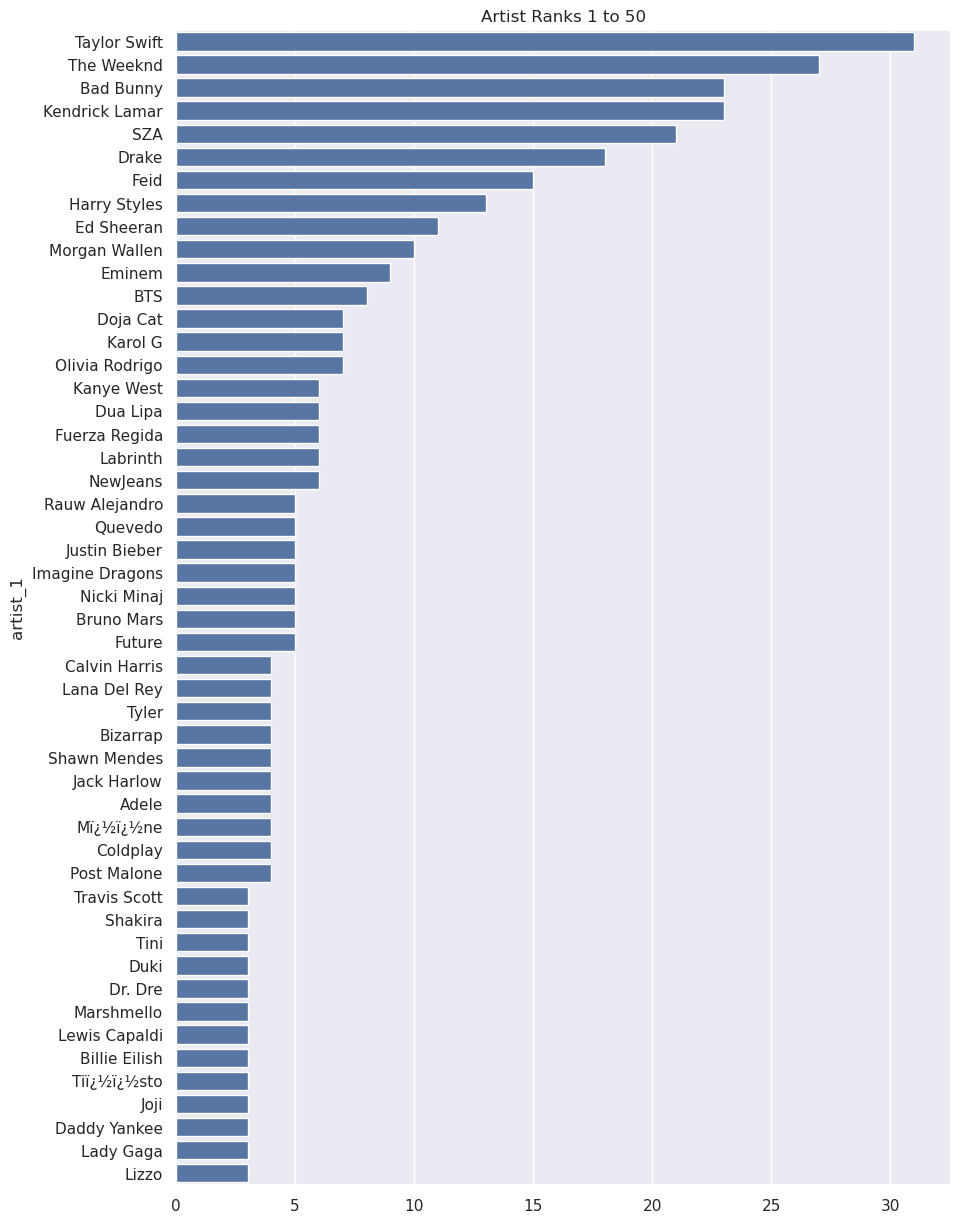

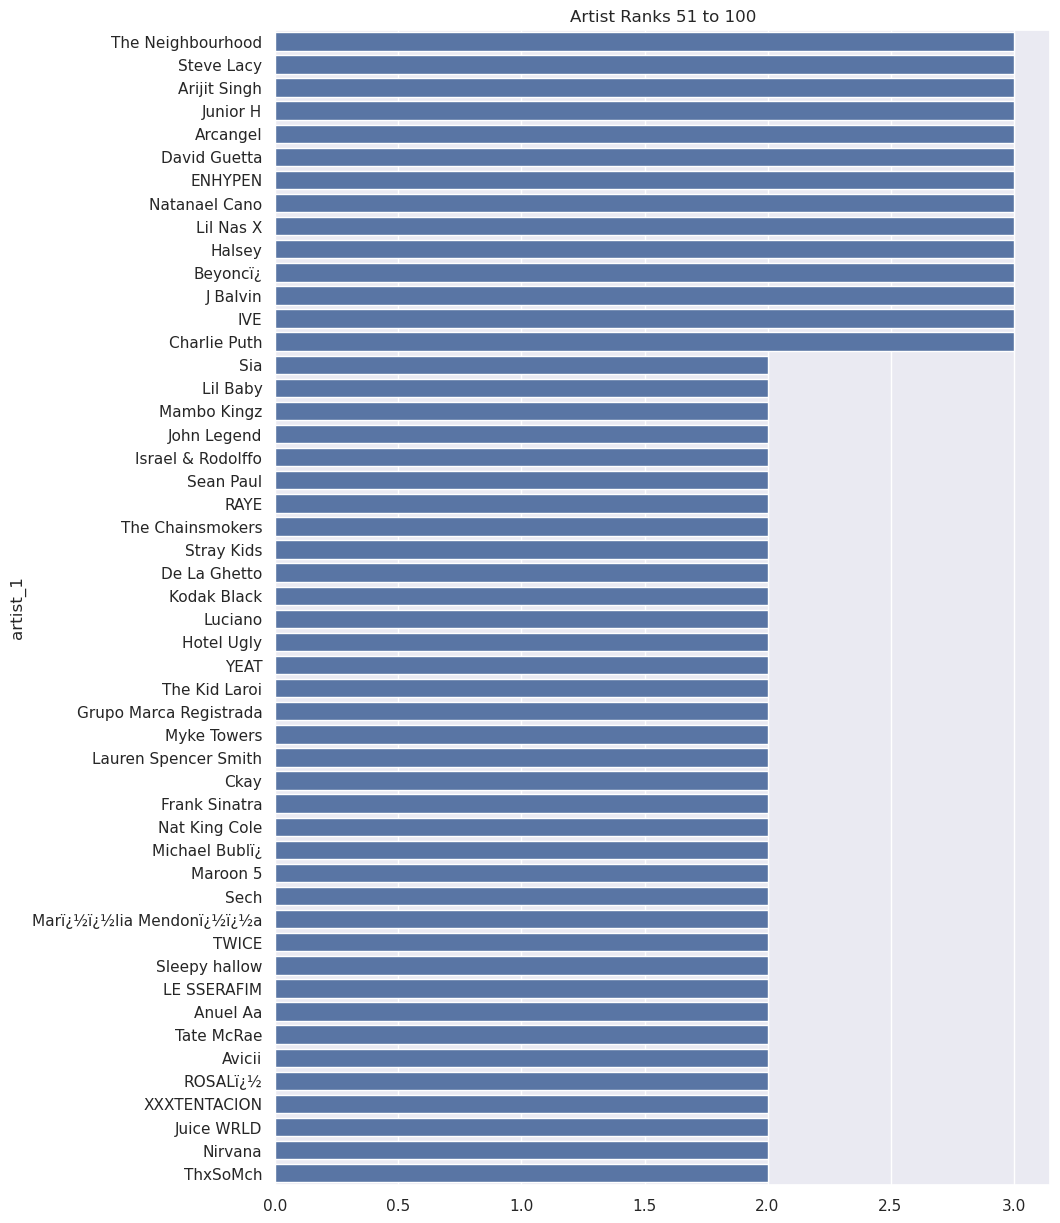

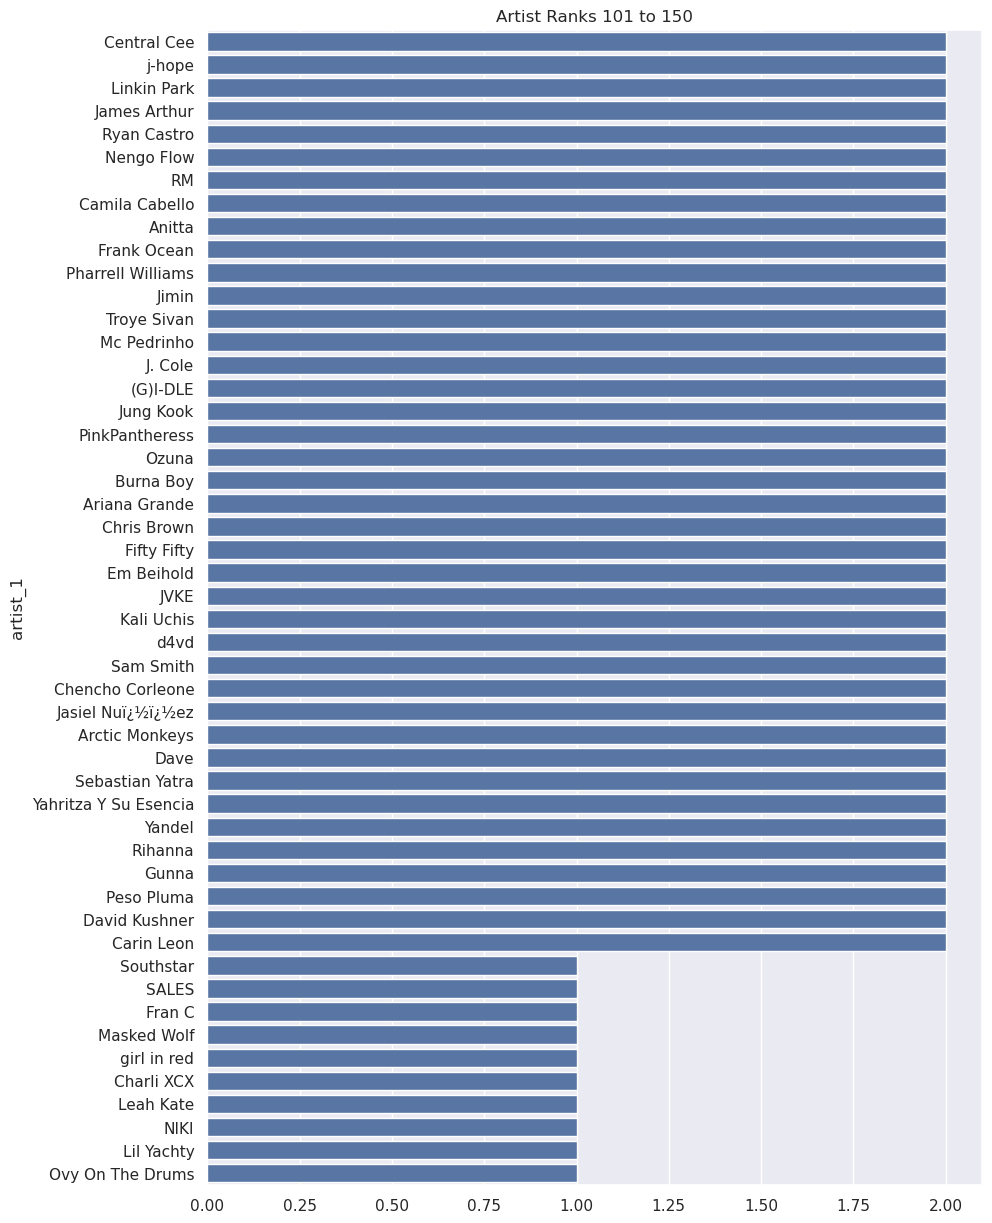

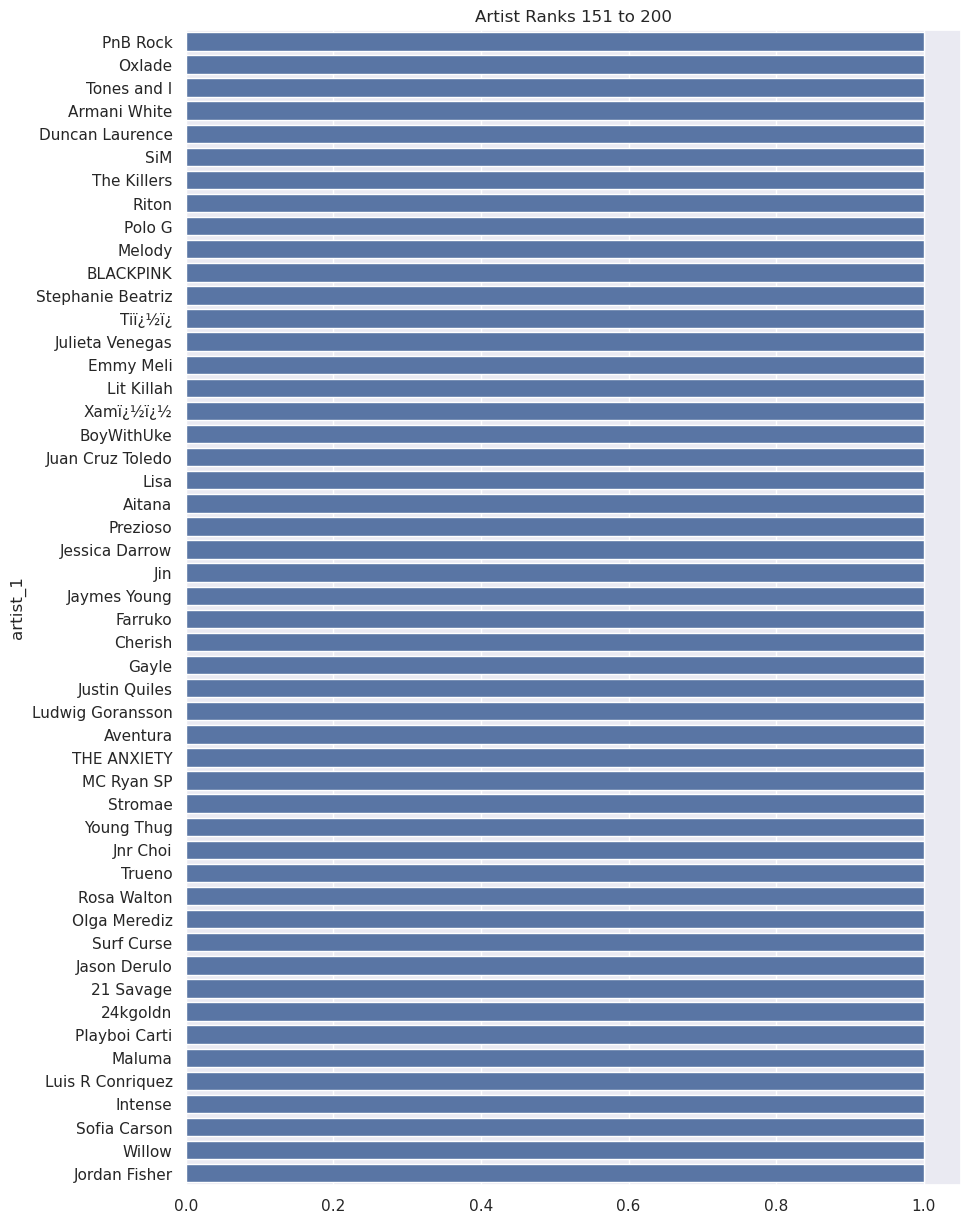

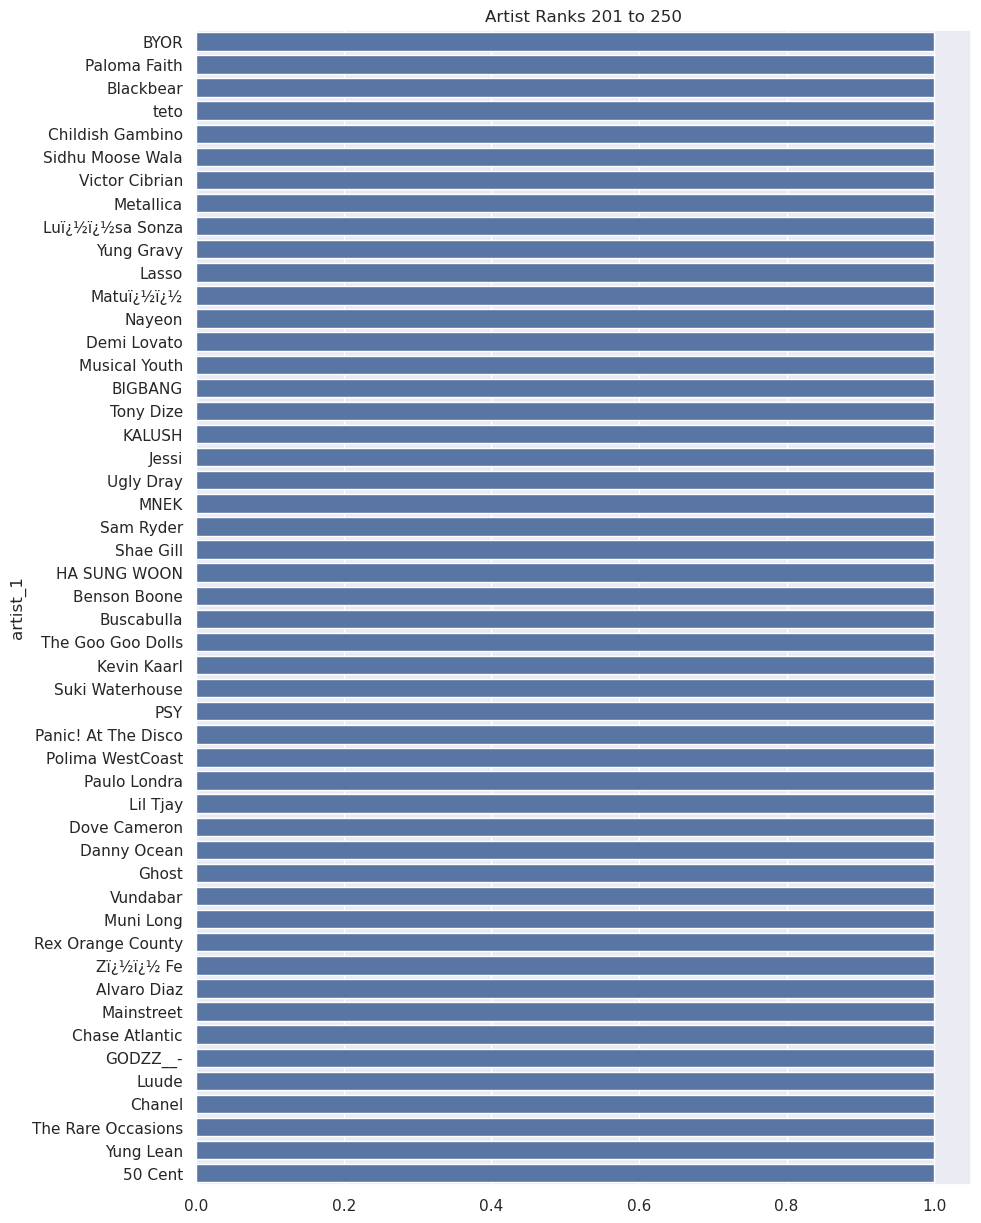

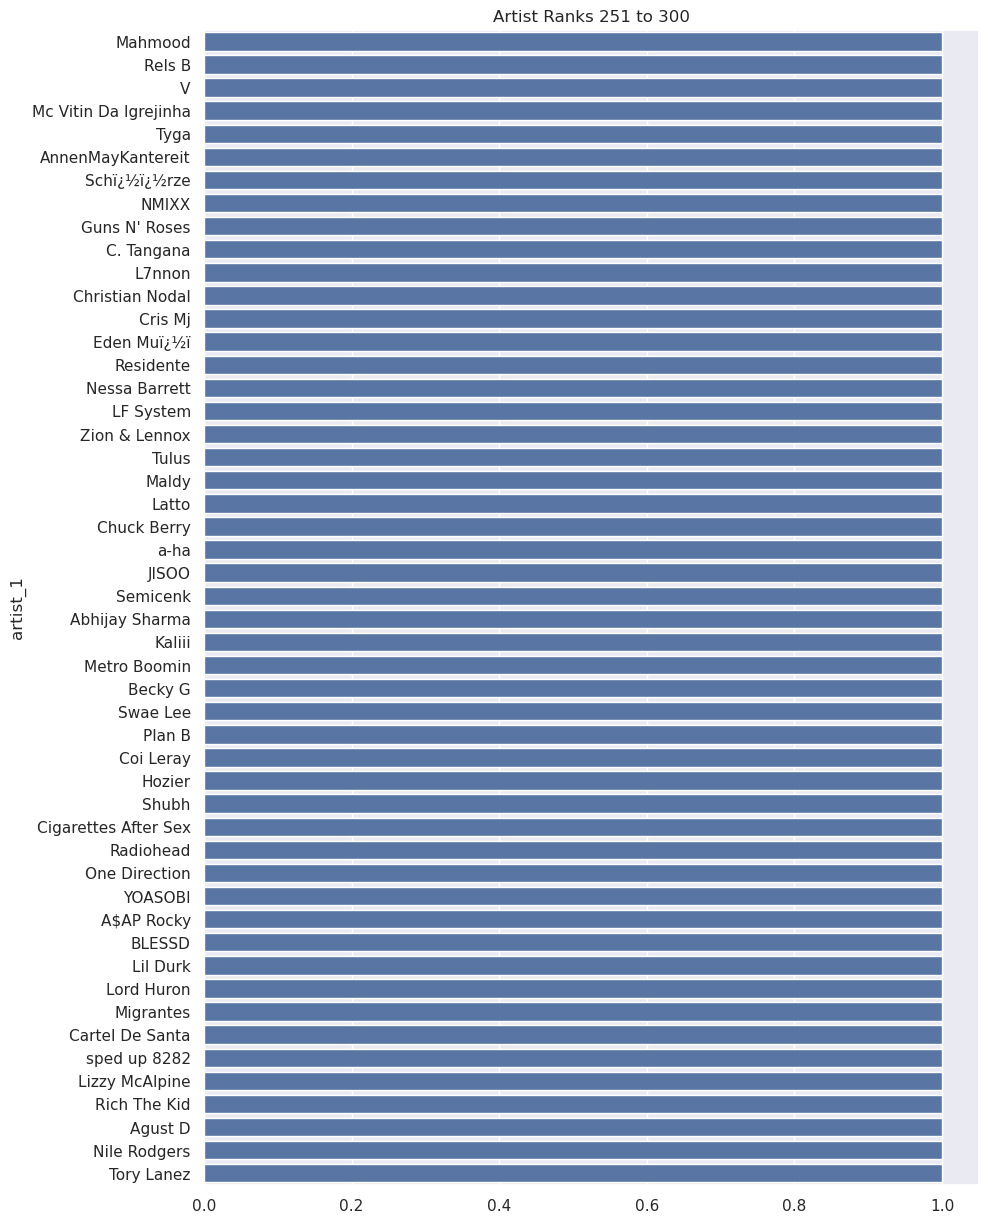

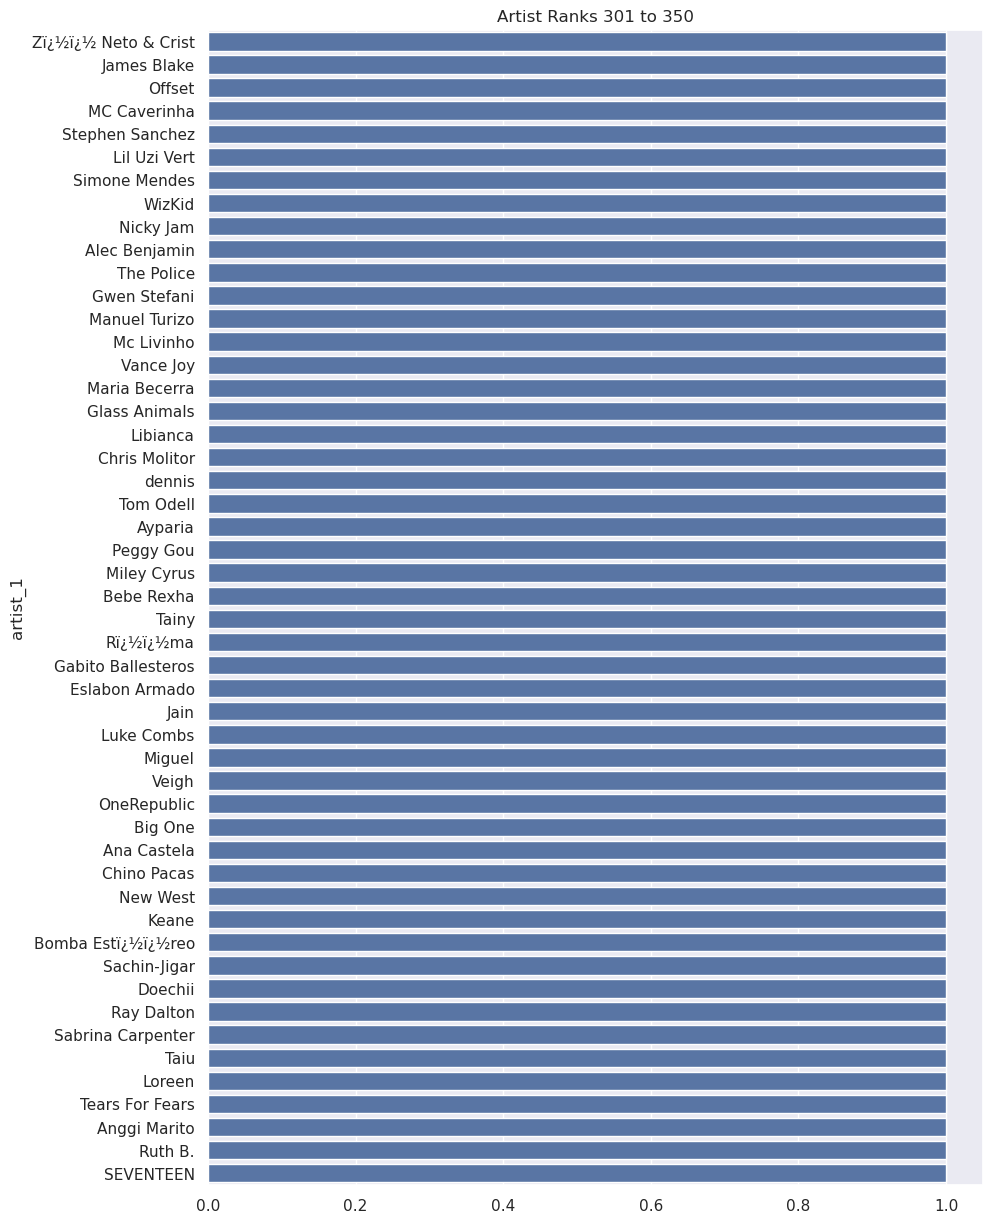

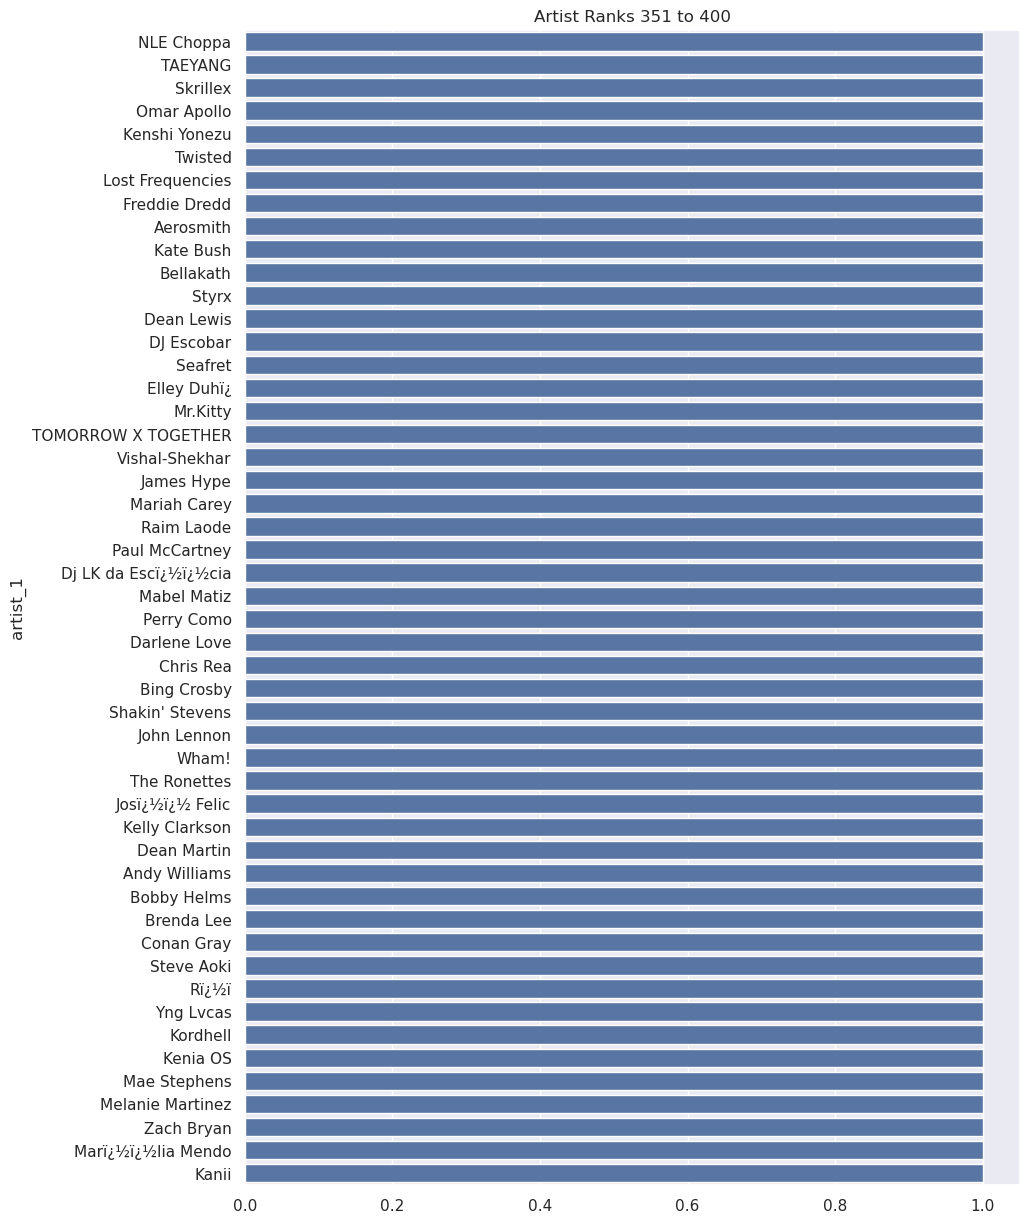

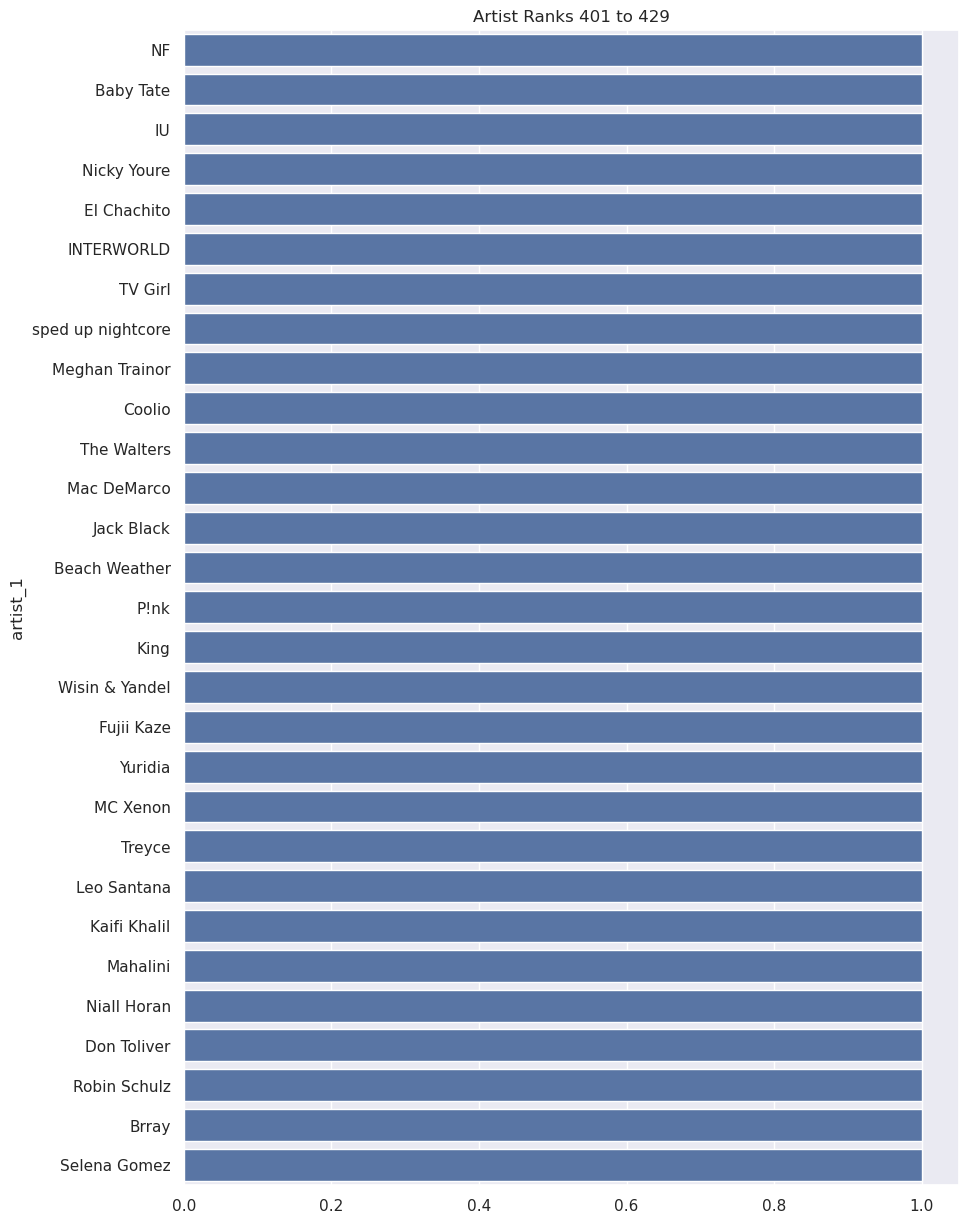

In [20]:
artist_count_series = df['artist_1'].value_counts()

artists_per_plot = 50

total_artists = len(artist_count_series)
number_of_plots = total_artists // artists_per_plot + (total_artists % artists_per_plot > 0)

for i in range(number_of_plots):

    start_idx = i * artists_per_plot
    end_idx = start_idx + artists_per_plot
    
    artist_count_subset = artist_count_series[start_idx:end_idx]
    
    plt.figure(figsize=(10, 15))
    sb.barplot(y=artist_count_subset.index, x=artist_count_subset.values)
    plt.title(f'Artist Ranks {start_idx + 1} to {min(end_idx, total_artists)}')
    plt.show()

## 2. Relationship Between Numerical Variables and Whether the Song is in spotify_top_100

In [21]:
from scipy.stats import pointbiserialr
import statsmodels.api as sm

numeric_predictors = ['streams', 'bpm', 'danceability_%','valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'instrumentalness_%']

for predictor in numeric_predictors:
    correlation, p_value = pointbiserialr(df[predictor], df['spotify_top_100'])
    print(f'Correlation between {predictor} and spotify_top_100: {correlation:.4f}, p-value: {p_value:.4g}')

Correlation between streams and spotify_top_100: 0.2109, p-value: 4.514e-10
Correlation between bpm and spotify_top_100: 0.0669, p-value: 0.05017
Correlation between danceability_% and spotify_top_100: 0.0255, p-value: 0.4558
Correlation between valence_% and spotify_top_100: 0.0508, p-value: 0.1376
Correlation between energy_% and spotify_top_100: 0.1002, p-value: 0.003326
Correlation between acousticness_% and spotify_top_100: -0.0475, p-value: 0.165
Correlation between liveness_% and spotify_top_100: -0.0343, p-value: 0.3152
Correlation between instrumentalness_% and spotify_top_100: -0.0674, p-value: 0.04848


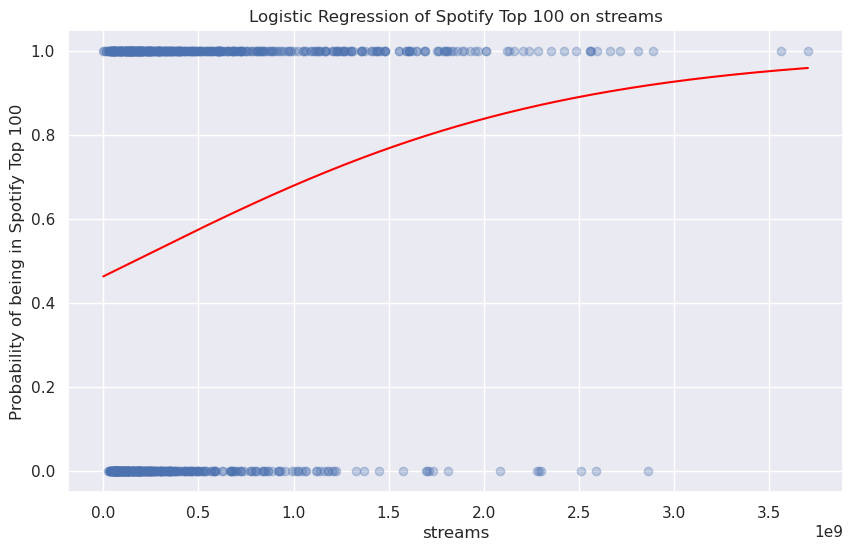

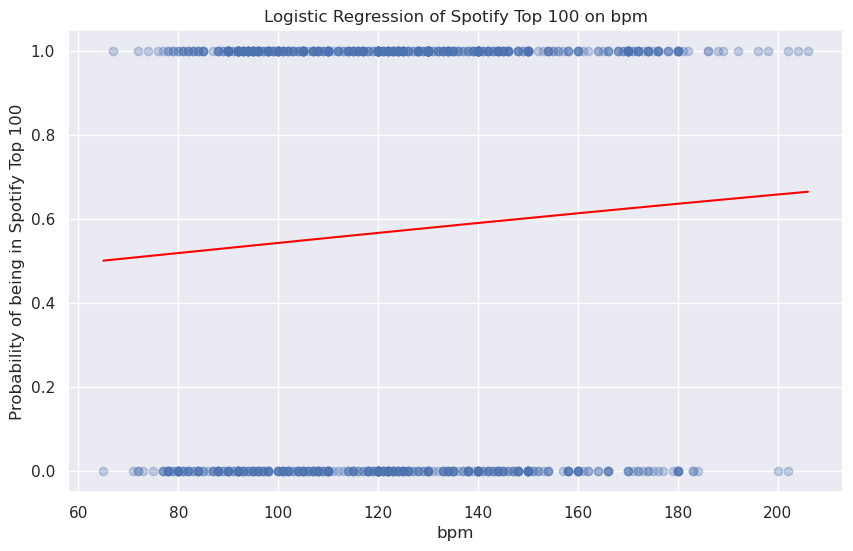

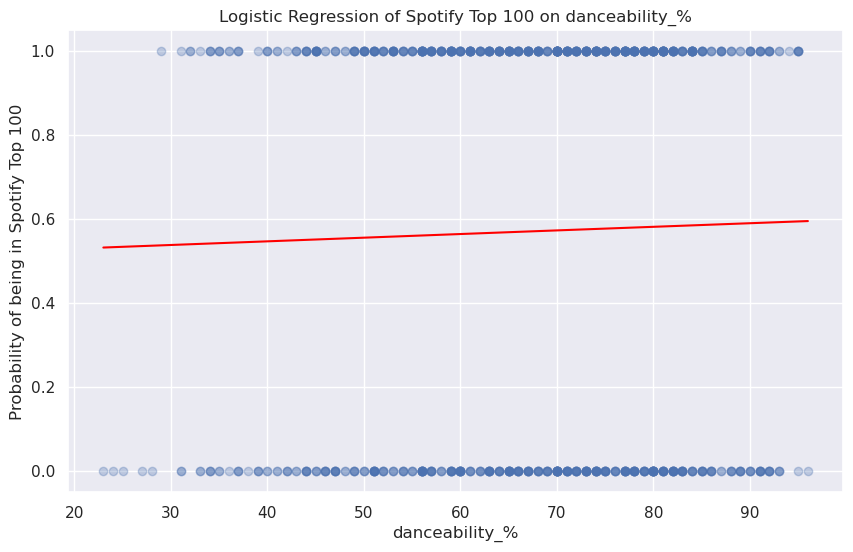

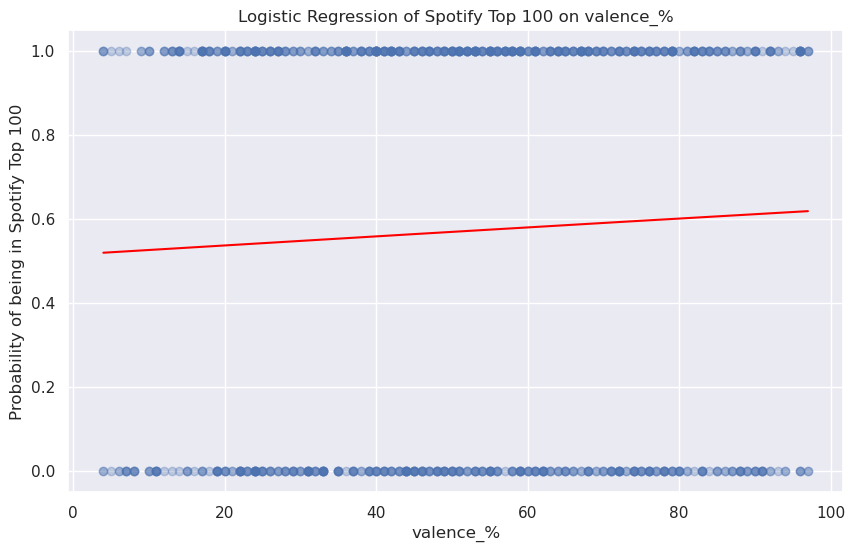

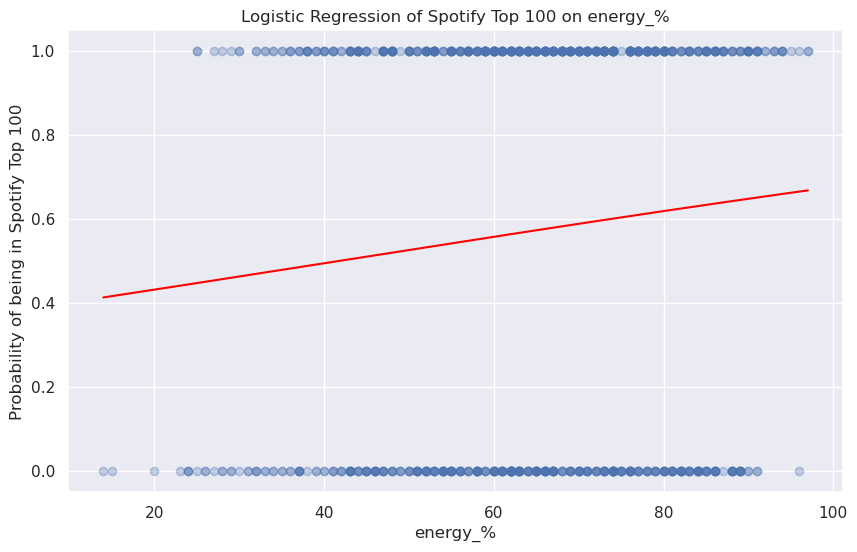

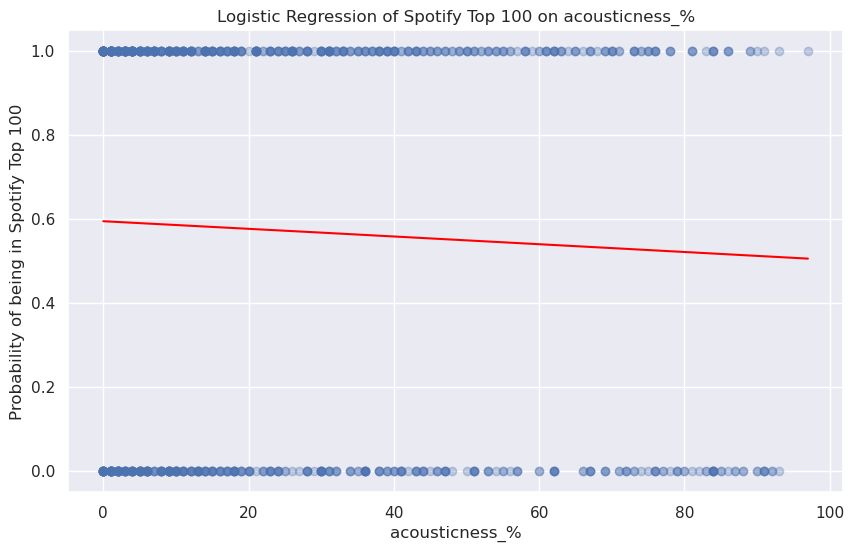

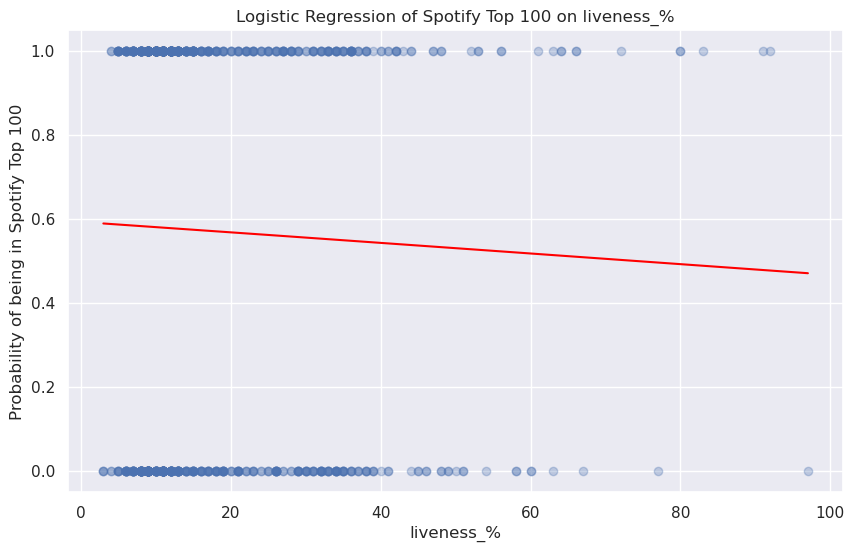

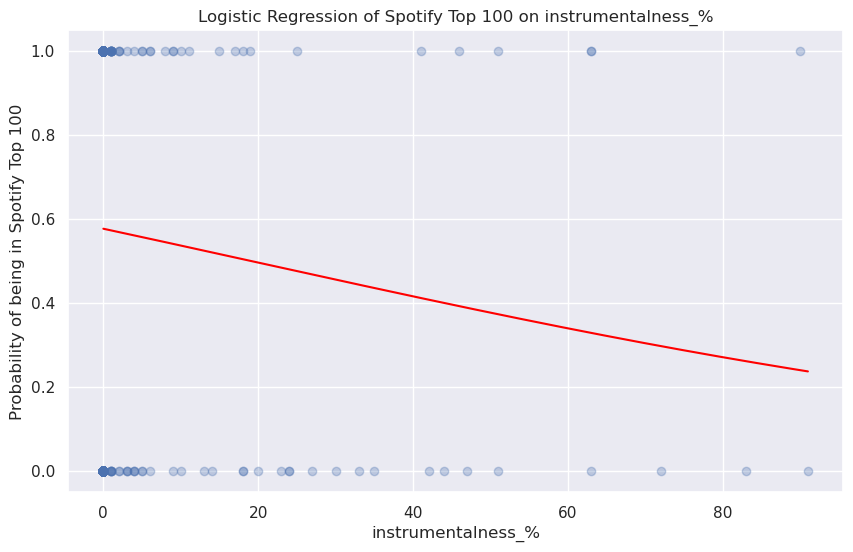

In [22]:
for predictor in numeric_predictors:

    X = sm.add_constant(df[predictor])
    
    model = sm.Logit(df['spotify_top_100'], X).fit(disp=0)

    x_values = np.linspace(df[predictor].min(), df[predictor].max(), 1000)

    y_values = model.predict(sm.add_constant(x_values))

    plt.figure(figsize=(10, 6))
    plt.scatter(df[predictor], df['spotify_top_100'], alpha=0.3)
    plt.plot(x_values, y_values, color='red')
    plt.xlabel(predictor)
    plt.ylabel('Probability of being in Spotify Top 100')
    plt.title(f'Logistic Regression of Spotify Top 100 on {predictor}')
    plt.show()

## 3. Relationship Between Categorical Variables and Whether the Song is in spotify_top_100

Chi-Squared Test for artist_count: Chi2 Statistic: 8.86, p-value: 0.2626


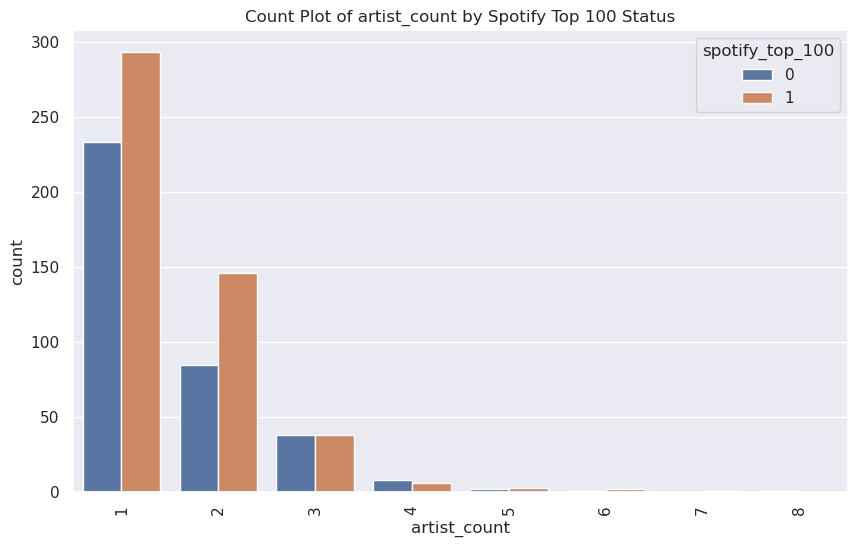

Chi-Squared Test for mode_major: Chi2 Statistic: 0.07, p-value: 0.7854


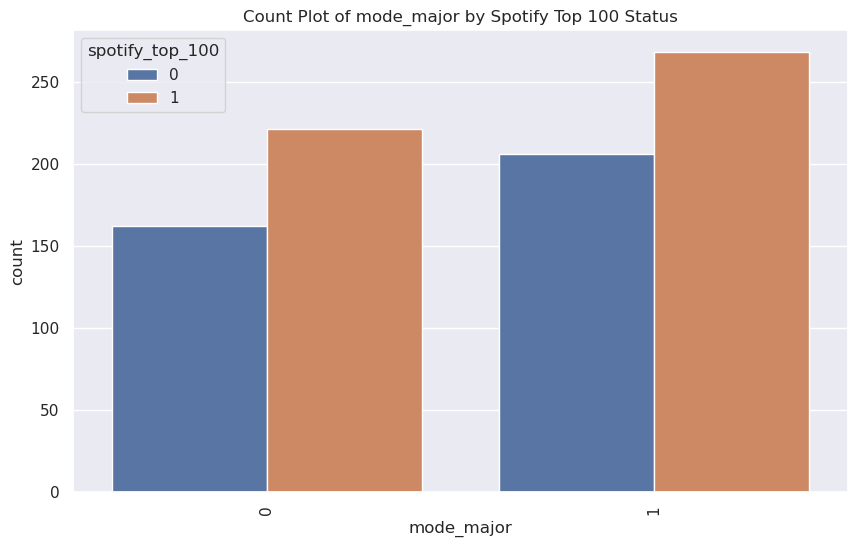

Chi-Squared Test for mode_minor: Chi2 Statistic: 0.07, p-value: 0.7854


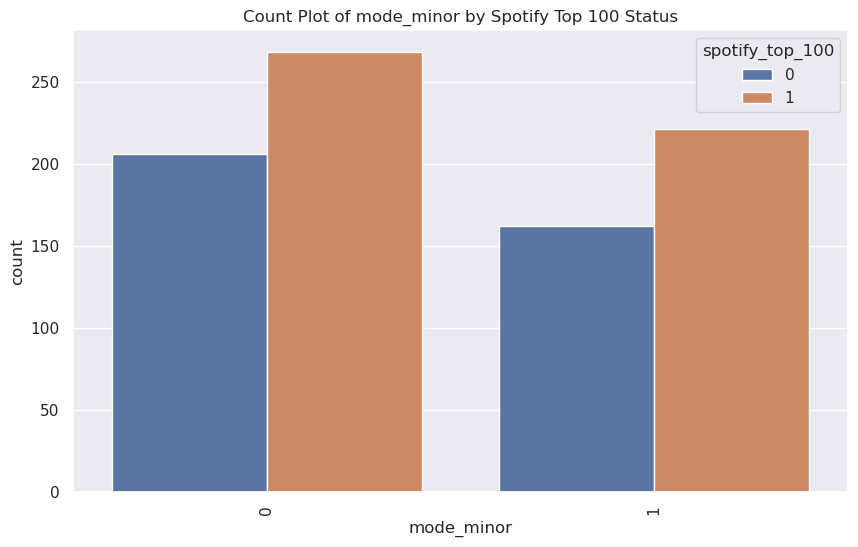

In [23]:
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = [col for col in categorical_df.columns if col.startswith(('artist_1_', 'key_')) or col in ['mode_major', 'mode_minor', 'artist_count', 'spotify_top_100']]

for cat_var in categorical_columns:
    if cat_var != 'spotify_top_100':
        contingency = pd.crosstab(categorical_df[cat_var], categorical_df['spotify_top_100'])
        chi2, p, dof, expected = chi2_contingency(contingency)
        print(f"Chi-Squared Test for {cat_var}: Chi2 Statistic: {chi2:.2f}, p-value: {p:.4f}")

        plt.figure(figsize=(10, 6))
        sns.countplot(x=cat_var, hue='spotify_top_100', data=categorical_df)
        plt.title(f'Count Plot of {cat_var} by Spotify Top 100 Status')
        plt.xticks(rotation=90)
        plt.show()

## 4. Correlation Within Numeric Variables

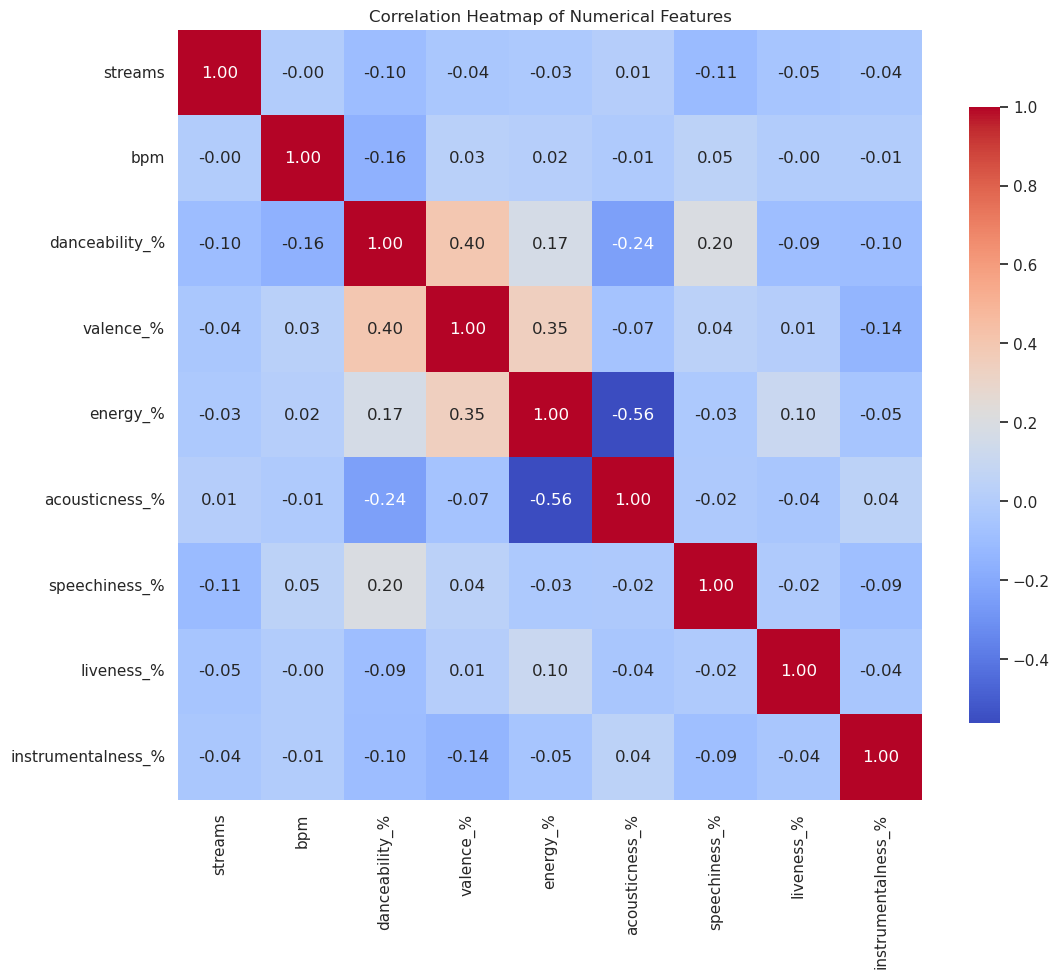

In [24]:
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()